In [40]:
#imporint warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data understanding

In [3]:
#reading the orders dataset

orders= pd.read_excel("Retail_dataset.xlsx", sheet_name='orders')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [4]:
#reading the order_items dataset

order_items= pd.read_excel("Retail_dataset.xlsx", sheet_name='order_items')
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [5]:
#reading the customers dataset
customers= pd.read_excel("Retail_dataset.xlsx", sheet_name='customers')
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
#reading the payments dataset
payments= pd.read_excel("Retail_dataset.xlsx", sheet_name='payments')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
#reading the products dataset
products= pd.read_excel("Retail_dataset.xlsx", sheet_name='products')
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


**Checking the dimensions of the 5 datasets**

In [8]:
orders.shape

(99441, 7)

In [9]:
order_items.shape

(112650, 6)

In [10]:
customers.shape

(99441, 4)

In [11]:
payments.shape

(103886, 5)

In [12]:
products.shape

(32951, 6)

## Data cleaning

**Checking for duplicate values**

In [13]:
orders.duplicated().sum()

0

In [14]:
order_items.duplicated().sum()

0

In [15]:
customers.duplicated().sum()

3089

In [16]:
payments.duplicated().sum()

0

In [17]:
products.duplicated().sum()

0

In [18]:
#removing duplicate records from customers table
customers= customers[-customers.duplicated()]
customers.shape

(96352, 4)

In [19]:
#checking duplicate values in customers again
customers.duplicated().sum()

0

#### Checking for null values

**Orders table**

In [20]:
#checking for null values in orders table
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
#Calculating percentage of null values
orders_nullvalues= pd.DataFrame(orders.isnull().sum())
orders_nullvalues["Missing values"]= orders_nullvalues[0]
orders_nullvalues["Null value percentage"]= orders_nullvalues["Missing values"].apply(lambda x: x/orders.shape[0]*100)
orders_nullvalues= orders_nullvalues[["Missing values", "Null value percentage"]]
orders_nullvalues

,Missing values,Null value percentage
order_id,0,0.000000
customer_id,0,0.000000
order_status,0,0.000000
order_purchase_timestamp,0,0.000000
order_approved_at,160,0.160899
order_delivered_timestamp,2965,2.981668
order_estimated_delivery_date,0,0.000000


In [22]:
#So we are removing the null values from orders table as it's a very small percentage of null values
orders= orders[-orders.order_approved_at.isnull()]
orders= orders[-orders.order_delivered_timestamp.isnull()]

#now checking null values again
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

**Order_items table**

In [23]:
order_items.isnull().sum() #no null values in this table

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

**Customers table**

In [24]:
customers.isnull().sum() #no null values in customers table

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Payments table**

In [25]:
payments.isnull().sum() #no null values in payments table

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Products table**

In [26]:
products.isnull().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [27]:
#Calculating percentage of null values
products_nullvalues= pd.DataFrame(products.isnull().sum())
products_nullvalues["Missing values"]= products_nullvalues[0]
products_nullvalues["Null value percentage"]= products_nullvalues["Missing values"].apply(lambda x: x/products.shape[0]*100)
products_nullvalues= products_nullvalues[["Missing values", "Null value percentage"]]
products_nullvalues

,Missing values,Null value percentage
product_id,0,0.000000
product_category_name,170,0.515918
product_weight_g,2,0.006070
product_length_cm,2,0.006070
product_height_cm,2,0.006070
product_width_cm,2,0.006070


In [28]:
#So we are removing the null values from products table as it's a very small percentage of null values
products= products[-products.product_category_name.isnull()]
products= products[-products.product_weight_g.isnull()]
products= products[-products.product_length_cm.isnull()]
products= products[-products.product_height_cm.isnull()]
products= products[-products.product_width_cm.isnull()]

#now checking the null values in products again
products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

### Outlier analysis

In [33]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


#### price

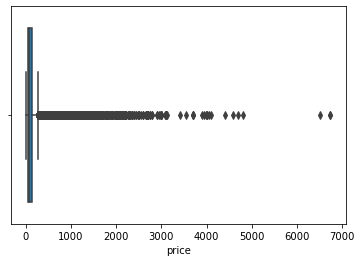

In [41]:
sns.boxplot(order_items.price)
plt.show()

In [55]:
order_items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [56]:
order_items.price.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00      0.85
0.25     39.90
0.50     74.99
0.75    134.90
0.90    229.80
0.99    890.00
Name: price, dtype: float64

In [64]:
#we are capping price at 5200 as the mean and median seem very far apart so the outliers may be having a considerable effect
order_items= order_items[order_items.price<=5200]
order_items.shape

(112647, 6)

#### shipping_charges

In [66]:
order_items.shape

(112647, 6)

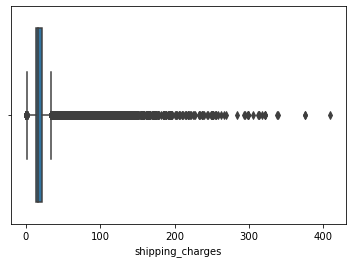

In [67]:
sns.boxplot(order_items.shipping_charges)
plt.show()

In [68]:
order_items2.shipping_charges.describe()

count    112647.000000
mean         19.985391
std          15.777519
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: shipping_charges, dtype: float64

In [69]:
order_items2.shipping_charges.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00     0.0000
0.25    13.0800
0.50    16.2600
0.75    21.1500
0.90    34.0400
0.99    84.4454
Name: shipping_charges, dtype: float64

The mean and median seem to be close to each other so we aren't removing the outliers here as they don't seem to have a big effect overall

#### Payment value

In [70]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


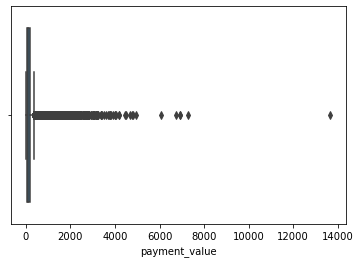

In [71]:
sns.boxplot(payments.payment_value)
plt.show()

In [72]:
payments.payment_value.describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [73]:
payments.payment_value.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00       0.0000
0.25      56.7900
0.50     100.0000
0.75     171.8375
0.90     297.2700
0.99    1039.9165
Name: payment_value, dtype: float64

In [76]:
#There seems to be a considerable distance between mean and median so we are gonna cap payment value upto 8000
payments= payments[payments.payment_value<=8000]
payments.shape

(103885, 5)

#### weight_g

In [45]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32779 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32779 non-null  object 
 1   product_category_name  32779 non-null  object 
 2   product_weight_g       32779 non-null  float64
 3   product_length_cm      32779 non-null  float64
 4   product_height_cm      32779 non-null  float64
 5   product_width_cm       32779 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


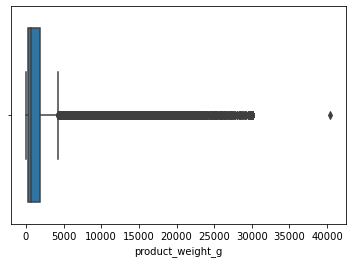

In [50]:
sns.boxplot(products.product_weight_g)
plt.show()

In [77]:
products.product_weight_g.describe()

count    32779.000000
mean      2275.931328
std       4280.002776
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

In [78]:
products.product_weight_g.quantile([0,0.25,0.5,0.75,0.9,0.99])

0.00        0.0
0.25      300.0
0.50      700.0
0.75     1900.0
0.90     6300.0
0.99    22530.5
Name: product_weight_g, dtype: float64

In [81]:
#there is a big difference between mean and median so we are capping product_weight_g to 35000
products= products[products.product_weight_g<=35000]
products.shape

(32778, 6)

#### product_length_cm

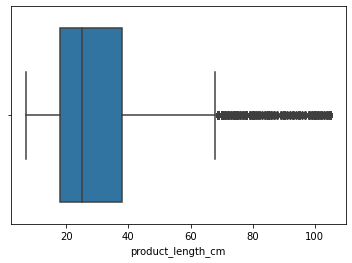

In [51]:
sns.boxplot(products.product_length_cm)
plt.show()

#### product_height_cm

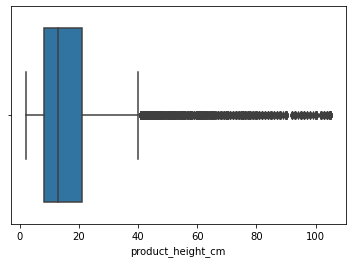

In [52]:
sns.boxplot(products.product_height_cm)
plt.show()

#### product_width_cm

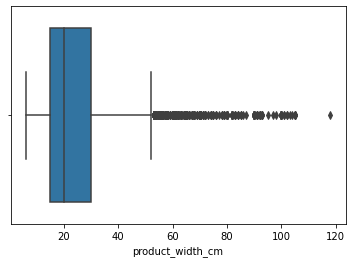

In [53]:
sns.boxplot(products.product_width_cm)
plt.show()

## Merging the datasets together into one dataset

In [91]:
#We need only delivered orders so subsetting the same from orders table
orders= orders[orders.order_status=='delivered']
orders.shape

(96456, 7)

**merging order_items and products table together**

In [105]:
#merging order_items and products table together
ordered_items_products= pd.merge(left=order_items, right=products, how='left', on='product_id')
ordered_items_products.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,toys,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,toys,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,toys,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,toys,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,toys,3750.0,35.0,40.0,30.0


In [106]:
#checking the shape of ordered_items_products
ordered_items_products.shape

(112647, 11)

In [107]:
ordered_items_products.isnull().sum()

order_id                   0
order_item_id              0
product_id                 0
seller_id                  0
price                      0
shipping_charges           0
product_category_name    414
product_weight_g         414
product_length_cm        414
product_height_cm        414
product_width_cm         414
dtype: int64

**now merging orders with ordered_items_products**

In [108]:
merged_data= pd.merge(left=orders, right=ordered_items_products, how='left', on='order_id')
merged_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,toys,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,toys,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,toys,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,toys,250.0,51.0,15.0,15.0


In [109]:
#checking shape
merged_data.shape

(110174, 17)

**now merging customers with merged data**

In [110]:
merged_data= pd.merge(left=merged_data, right=customers, how='left', on='customer_id')
merged_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,toys,400.0,19.0,13.0,19.0,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,toys,420.0,24.0,19.0,21.0,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,toys,450.0,30.0,10.0,20.0,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,toys,250.0,51.0,15.0,15.0,9195,santo andre,SP


**now merging payments with merged data**

In [114]:
merged_data= pd.merge(left=merged_data, right=payments, how='left', on='order_id')
merged_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,19.0,13.0,19.0,47813,barreiras,BA,1.0,wallet,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,24.0,19.0,21.0,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


In [115]:
#checking shape
merged_data.shape

(115716, 24)

In [116]:
merged_data.isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_timestamp          0
order_estimated_delivery_date      0
order_item_id                      3
product_id                         3
seller_id                          3
price                              3
shipping_charges                   3
product_category_name            437
product_weight_g                 437
product_length_cm                437
product_height_cm                437
product_width_cm                 437
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
payment_sequential                11
payment_type                      11
payment_installments              11
payment_value                     11
dtype: int64

In [120]:
#dropping all null values from merged data
merged_data2= merged_data.dropna(axis=0)
merged_data2.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [121]:
merged_data2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,19.0,13.0,19.0,47813,barreiras,BA,1.0,wallet,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,24.0,19.0,21.0,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


In [122]:
merged_data2.shape

(115268, 24)

**The data is now clean and merged into a single dataset**

## Exporting the cleaned set to an excel file for data visualization in tableau/power bi for insight generation

In [123]:
filename= "Retail_dataset_cleaned.xlsx"
merged_data2.to_excel(filename)